# PART 2 - CAN WE OMIT SOME CONTROLS?

# Causal structure (todas las flechas con efecto verdadero = 1):
1. X → Y
2. Z1 → X,  Z1 → Y
3. Z2 → X,  Z2 → Y
4. Z3 → Z2, Z3 → Y

In [16]:
import Pkg
Pkg.add(["DataFrames", "StatsModels", "GLM", "Graphs", "GraphPlot", "Compose", "Distributions", "CSV"])



   Resolving package versions...
   Installed WorkerUtilities ─ v1.6.1
   Installed WeakRefStrings ── v1.4.2
   Installed CSV ───────────── v0.10.15
    Updating `C:\Users\ARIANA\Project.toml`
  [336ed68f] + CSV v0.10.15
    Updating `C:\Users\ARIANA\Manifest.toml`
  [336ed68f] + CSV v0.10.15
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
Precompiling project...
   1466.4 ms  ✓ WorkerUtilities
   1647.6 ms  ✓ WeakRefStrings
           ✗ BaseDirs
           ✗ FreeTypeAbstraction
           ✗ MathTeXEngine
           ✗ Makie
           ✗ CairoMakie
           ✗ Plots
  58356.3 ms  ✓ CSV
           ✗ Polynomials → PolynomialsMakieExt
           ✗ Plots → UnitfulExt
           ✗ Plots → IJuliaExt
           ✗ Plots → FileIOExt
           ✗ Plots → GeometryBasicsExt
  3 dependencies successfully precompiled in 333 seconds. 488 already precompiled.
  11 dependencies errored.
  For a report of the errors see `julia> err`. To retry use `pkg> precompile`


In [20]:
import Pkg
Pkg.add(["Cairo", "Fontconfig"])


   Resolving package versions...
  No Changes to `C:\Users\ARIANA\Project.toml`
  No Changes to `C:\Users\ARIANA\Manifest.toml`
Precompiling project...
           ✗ BaseDirs
           ✗ FreeTypeAbstraction
           ✗ MathTeXEngine
           ✗ Makie
           ✗ CairoMakie
           ✗ Plots
           ✗ Polynomials → PolynomialsMakieExt
           ✗ Plots → IJuliaExt
           ✗ Plots → UnitfulExt
           ✗ Plots → GeometryBasicsExt
           ✗ Plots → FileIOExt
  0 dependencies successfully precompiled in 309 seconds. 491 already precompiled.
  11 dependencies errored.
  For a report of the errors see `julia> err`. To retry use `pkg> precompile`


In [22]:
using Cairo, Fontconfig


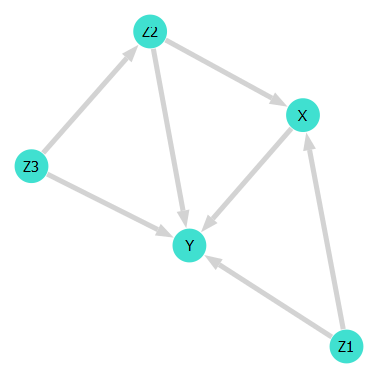

5×8 DataFrame
 Row │ model                     beta_X    se_X       t         p        lo99      hi99     sig_1pct 
     │ String                    Float64   Float64    Float64   Float64  Float64   Float64  Bool     
─────┼───────────────────────────────────────────────────────────────────────────────────────────────
   1 │ (1) Y ~ X                 2.0115    0.0139584  144.107       0.0  1.97555   2.04746      true
   2 │ (2) Y ~ X + Z1            2.00395   0.0160835  124.596       0.0  1.96252   2.04538      true
   3 │ (3) Y ~ X + Z2            1.48243   0.0164586   90.0702      0.0  1.44004   1.52483      true
   4 │ (4) Y ~ X + Z1 + Z2       0.961883  0.0198325   48.5004      0.0  0.910798  1.01297      true
   5 │ (5) Y ~ X + Z1 + Z2 + Z3  0.978238  0.015992    61.1705      0.0  0.937045  1.01943      true

Resumen (4): Y ~ X + Z1 + Z2


|             |      Coef. | Std. Error |     t | Pr(>|t|) |  Lower 95% | Upper 95% |
|:------------|-----------:|-----------:|------:|:---------|:-----------|----------:|
| (Intercept) | -0.0130086 |  0.0197632 | -0.66 |   0.5104 | -0.0517555 | 0.0257382 |
| X           |  0.961883  |  0.0198325 | 48.50 |   <1e-99 |  0.923     | 1.00077 |
| Z1          |  1.05246   |  0.028078  | 37.48 |   <1e-99 |  0.997416  | 1.10751 |
| Z2          |  1.56142   |  0.0244135 | 63.96 |   <1e-99 |  1.51356   | 1.60929 |


Resumen (5): Y ~ X + Z1 + Z2 + Z3


|             |        Coef. | Std. Error |     t | Pr(>|t|) |  Lower 95% | Upper 95% |
|:------------|-------------:|-----------:|------:|:---------|:-----------|----------:|
| (Intercept) | -0.000202531 |  0.0159346 | -0.01 |   0.9899 | -0.0314433 | 0.0310382 |
| X           |  0.978238    |  0.015992  | 61.17 |   <1e-99 |  0.946884  | 1.00959 |
| Z1          |  1.01629     |  0.0226487 | 44.87 |   <1e-99 |  0.971888  | 1.0607 |
| Z2          |  1.01952     |  0.0228844 | 44.55 |   <1e-99 |  0.974654  | 1.06439 |
| Z3          |  1.03755     |  0.022357  | 46.41 |   <1e-99 |  0.99372   | 1.08138 |


Conclusiones:
- (4) y (5) recuperan beta_X ≈ 1 al controlar Z1 y Z2.
- Z3 puede omitirse sin sesgo porque X <- Z2 <- Z3 -> Y queda bloqueado al controlar Z2.
- (5) puede ser menos preciso que (4) por colinealidad entre Z3 y Z2.


In [48]:
# ================== Parte 2 — Julia 1.11.6 (sin Plots/GR) ==================
# DAG + simulación + 5 OLS + tabla de X (IC 99%) + gráfico de Simpson (Gadfly)

using Pkg
for pkg in ["Graphs","GraphPlot","Compose","Cairo","Fontconfig",
            "DataFrames","GLM","StatsModels","Distributions",
            "Gadfly","Random","Statistics","Measures"]
    haskey(Pkg.project().dependencies, pkg) || Pkg.add(pkg)
end

using Graphs, GraphPlot, Compose
using Cairo, Fontconfig
using DataFrames, GLM, StatsModels, Distributions
using Gadfly, Random, Statistics, Measures

# ---------- 1) DAG ----------
g = DiGraph(5)  # 1=Z1, 2=Z2, 3=Z3, 4=X, 5=Y
add_edge!(g, 3, 2); add_edge!(g, 3, 5)
add_edge!(g, 1, 4); add_edge!(g, 1, 5)
add_edge!(g, 2, 4); add_edge!(g, 2, 5)
add_edge!(g, 4, 5)
labels = ["Z1","Z2","Z3","X","Y"]
ctx = gplot(g; nodelabel=labels, arrowlengthfrac=0.12, nodesize=0.25)
display(ctx)
draw(PNG("dag_part2.png", 900, 520), ctx)

# ---------- 2) Simulación (todas las flechas con efecto = 1) ----------
Random.seed!(123)
n = 4000
e1 = randn(n); e2 = randn(n); e3 = randn(n); ex = randn(n); ey = randn(n)
Z3 = e3
Z2 = Z3 .+ e2
Z1 = e1
X  = Z1 .+ Z2 .+ ex
Y  = X  .+ Z1 .+ Z2 .+ Z3 .+ ey
df = DataFrame(Y=Y, X=X, Z1=Z1, Z2=Z2, Z3=Z3)

# ---------- 3) OLS ----------
m1 = lm(@formula(Y ~ X),               df)
m2 = lm(@formula(Y ~ X + Z1),          df)
m3 = lm(@formula(Y ~ X + Z2),          df)
m4 = lm(@formula(Y ~ X + Z1 + Z2),     df)
m5 = lm(@formula(Y ~ X + Z1 + Z2 + Z3),df)

# ---------- 4) Tabla compacta del coeficiente de X con IC 99% ----------
function row_for_X(mod, name; α=0.01)
    idx = findfirst(==("X"), coefnames(mod))
    β   = coef(mod)[idx]
    se  = stderror(mod)[idx]
    t   = β / se
    ν   = dof_residual(mod)
    p   = 2 * ccdf(TDist(ν), abs(t))             # p-valor bilateral
    z   = quantile(Normal(), 1 - α/2)            # 99% CI
    lo  = β - z*se
    hi  = β + z*se
    (model=name, beta_X=β, se_X=se, t=t, p=p, lo99=lo, hi99=hi, sig_1pct = p < 0.01)
end

est = DataFrame([
    row_for_X(m1, "(1) Y ~ X"),
    row_for_X(m2, "(2) Y ~ X + Z1"),
    row_for_X(m3, "(3) Y ~ X + Z2"),
    row_for_X(m4, "(4) Y ~ X + Z1 + Z2"),
    row_for_X(m5, "(5) Y ~ X + Z1 + Z2 + Z3"),
])
println(est)

println("\nResumen (4): Y ~ X + Z1 + Z2");  display(coeftable(m4))
println("\nResumen (5): Y ~ X + Z1 + Z2 + Z3"); display(coeftable(m5))

# ----- Gráfico de Simpson sin warnings de Pango -----
using Measures

# datos y modelos iguales a antes ...
# (dfS, mA, mB, mP, βA, βB, βP, xgrid, lines_df ya creados)

title_txt = "Simpson: pendiente &gt; 0 en A y B; pendiente pooled &lt; 0"

plt = plot(
    layer(dfS, x=:X, y=:Y, color=:group, Geom.point,
          Theme(point_size=2.2pt, alphas=[0.85])),
    layer(lines_df, x=:X, y=:Y, color=:which, Geom.line,
          Theme(line_width=1.6pt, discrete_highlight_color = c->colorant"black")),
    Guide.XLabel("X"),
    Guide.YLabel("Y"),
    Guide.Title(title_txt),          # <-- escapado
    Scale.color_discrete
)

draw(PNG("simpson_scatter_lines.png", 900pt, 520pt), plt)
display(plt)


# ---------- 6) Conclusiones ----------
println("\nConclusiones:")
println("- (4) y (5) recuperan beta_X ≈ 1 al controlar Z1 y Z2.")
println("- Z3 puede omitirse sin sesgo porque X <- Z2 <- Z3 -> Y queda bloqueado al controlar Z2.")
println("- (5) puede ser menos preciso que (4) por colinealidad entre Z3 y Z2.")

# Archivos: dag_part2.png, simpson_scatter_lines.png
